<a href="https://colab.research.google.com/github/sosmany1/RNN_Parity-Problem/blob/master/RNN_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loss 0.9993611 Accuracy Last Time Step 0.43
Loss 1.0008513 Accuracy Last Time Step 0.46
Loss 0.99922395 Accuracy Last Time Step 0.48
Loss 1.0002291 Accuracy Last Time Step 0.46
Loss 0.99816734 Accuracy Last Time Step 0.46
Loss 1.0001124 Accuracy Last Time Step 0.53
Loss 0.9985367 Accuracy Last Time Step 0.55
Loss 0.9980092 Accuracy Last Time Step 0.5
Loss 0.99904037 Accuracy Last Time Step 0.48
Loss 1.0003138 Accuracy Last Time Step 0.46
Loss 0.9995564 Accuracy Last Time Step 0.49
Loss 0.9998002 Accuracy Last Time Step 0.52
Loss 0.999916 Accuracy Last Time Step 0.53
Loss 0.99856097 Accuracy Last Time Step 0.55
Loss 

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


1.0011013 Accuracy Last Time Step 0.48
Loss 0.99993414 Accuracy Last Time Step 0.54
Loss 0.99941933 Accuracy Last Time Step 0.55
Loss 0.9995158 Accuracy Last Time Step 0.54
Loss 0.99682486 Accuracy Last Time Step 0.44
Loss 0.9990572 Accuracy Last Time Step 0.58
Loss 0.9985435 Accuracy Last Time Step 0.49
Loss 0.99892133 Accuracy Last Time Step 0.47
Loss 0.99925613 Accuracy Last Time Step 0.5
Loss 0.9997146 Accuracy Last Time Step 0.52
Loss 1.0003163 Accuracy Last Time Step 0.43
Loss 1.0001831 Accuracy Last Time Step 0.48
Loss 0.9980307 Accuracy Last Time Step 0.54
Loss 0.9971531 Accuracy Last Time Step 0.55
Loss 0.99865746 Accuracy Last Time Step 0.51
Loss 0.9995311 Accuracy Last Time Step 0.46
Loss 1.0001382 Accuracy Last Time Step 0.5
Loss 0.9981355 Accuracy Last Time Step 0.4
Loss 0.99930894 Accuracy Last Time Step 0.43
Loss 1.0000069 Accuracy Last Time Step 0.52
Loss 1.0007659 Accuracy Last Time Step 0.5
Loss 1.0000224 Accuracy Last Time Step 0.47
Loss 0.9961617 Accuracy Last Time 

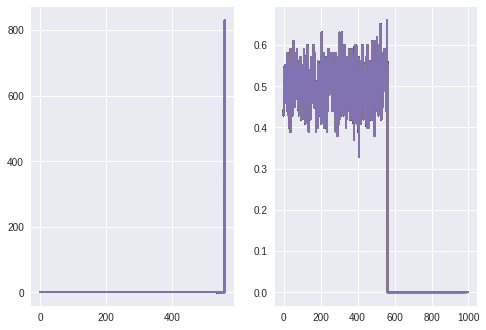

In [0]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math


num_epochs = 1000 
total_series_length = 100
state_size = 20 
num_classes = 1 
batch_size = 100 
_learning_rate = 1e-1

        
def generateData():
    x = 1.0-2*(np.random.randn(batch_size,total_series_length) < 0).astype(np.float32) 
    y = np.zeros((batch_size,total_series_length),np.float32) 
    for i in range(total_series_length):
      y[:, i] = np.prod(x[:,0:(i+1)],axis=1)
        
    x = x.reshape((batch_size, -1))  
    y = y.reshape((batch_size, -1))
    return x, y

batchX_placeholder = tf.placeholder(tf.float32, [batch_size, total_series_length]) 
batchY_placeholder = tf.placeholder(tf.float32, [batch_size, total_series_length]) 

inputs_series = tf.unstack(value=batchX_placeholder, axis=1, num=total_series_length) 
labels_series = tf.unstack(value=batchY_placeholder, axis=1, num=total_series_length) 

inputs_series = [tf.expand_dims(current_input,axis=1) for current_input in inputs_series]
labels_series = [tf.expand_dims(current_label, axis=1) for current_label in labels_series]

W = tf.Variable(tf.truncated_normal([2, state_size], stddev=1.0 / math.sqrt(float(2))), name='weights1')
b = tf.Variable(tf.zeros([state_size]),name='biases1')

W2 = tf.Variable(tf.truncated_normal([state_size, 1], stddev=1.0 / math.sqrt(float(state_size))), name='weights2')
b2 = tf.Variable(tf.zeros([1]),name='biases2')


prev_logit = tf.ones([batch_size, 1])
states_series = []
logits_series = []
for current_input in inputs_series:
  
    current_input = tf.reshape(current_input, [batch_size, 1])
    prev_logit = tf.reshape(prev_logit, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, prev_logit],1) 
    
    next_state = tf.nn.relu(tf.matmul(input_and_state_concatenated, W) + b)  
    states_series.append(next_state)    
    
    prev_logit = tf.matmul(next_state, W2) + b2 
    logits_series.append(prev_logit)


losses = [(tf.reduce_mean(tf.nn.relu(1.0 - logits*labels))) for logits, labels in zip(logits_series,labels_series) ]  
total_loss = tf.reduce_mean(losses)

train_step = tf.train.GradientDescentOptimizer(learning_rate=_learning_rate).minimize(total_loss)

accuracy = tf.reduce_mean(tf.cast(labels_series[-1]*logits_series[-1]>0,tf.float32))

  
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    plt.ion()#
    plt.figure()#
    plt.show()#
    loss_list = []#
    accuracy_list = []
    for epoch_idx in range(num_epochs):
      x,y = generateData()
      _total_loss, _,_acc = sess.run(
          [total_loss, train_step, accuracy],
          feed_dict={
              batchX_placeholder:x,
              batchY_placeholder:y
          })
      loss_list.append(_total_loss)
      accuracy_list.append(_acc)
      plt.subplot(1, 2, 1)
      plt.plot(loss_list)
      plt.subplot(1, 2, 2)
      plt.plot(accuracy_list)

      #print("Step",epoch_idx, "Accuracy Last Time Step", _acc)
      print("Loss",_total_loss, "Accuracy Last Time Step", _acc)
    #test on new data
    #x,y = generateData()
    #_total_loss, _acc = sess.run(
    #    [total_loss, accuracy],
    #    feed_dict={
    #        batchX_placeholder:x,
    #        batchY_placeholder:y
    #     })
    #print("Testing set Loss",_total_loss, "Accuracy Last Time Step", _acc)
plt.ioff()
plt.show()